## Análise de Dados da Manuteção

In [3]:
import pandas as pd

df = pd.read_excel('Manutenção.xlsx')

In [5]:
# Exibe as duas primeiras linhas do DataFrame
df.head(2)

,SS,Local,Categoria,Linha,Equipamento,Descrição,Prioridade,DataAbertura,Termino Previsto,TerminoReal,Status,SLA,Tipo,Oficina
0,SS2478214,REM01-1000-1200-E000005,Pomadas,P-02,Esteira P-02,Atraso na inicialização,3,2022-09-21,2022-10-23,20/10/2022,Encerrado,SLA atendido,Segurança,Elétrica
1,SS2478215,REM01-1000-1100-E000001,Pomadas,P-01,Envasadora P-01,Interrupção durante o ciclo de trabalho,3,2022-08-28,2022-09-27,25/09/2022,Encerrado,SLA atendido,Segurança,Operação


In [7]:
# Visualizar as últimas linhas do DataFrame
df.tail(3)

,SS,Local,Categoria,Linha,Equipamento,Descrição,Prioridade,DataAbertura,Termino Previsto,TerminoReal,Status,SLA,Tipo,Oficina
3282,SS2481496,REM01-3000-3100-C000002,Utilidades,Compressores,Compressor - GA 160,Falha no encoder,2,2024-03-31,2024-04-15,13/04/2024,Encerrado,SLA atendido,Produtividade,Automação
3283,SS2481497,REM01-1000-1200-F000001,Pomadas,Fabricação Pomadas,Mixer 1 Pomadas,Acionamento indevido de alarmes,3,2024-03-31,2024-04-30,28/04/2024,Encerrado,SLA atendido,Segurança,Elétrica
3284,SS2481498,REM01-3000-3200-T000001,Utilidades,Subsestação,Trafo 1000 KVA,Interferência eletromagnética,2,2024-03-29,2024-04-13,09/04/2024,Encerrado,SLA atendido,Meio Ambiente,Mecânica


In [9]:
print(df.columns)

Index(['SS', 'Local', 'Categoria', 'Linha', 'Equipamento', 'Descrição',
       'Prioridade', 'DataAbertura', 'Termino Previsto', 'TerminoReal',
       'Status', 'SLA', 'Tipo', 'Oficina'],
      dtype='object')


In [11]:
#Este comando nos mostra o tipo de formatação de cada coluna
df.dtypes

SS                          object
Local                       object
Categoria                   object
Linha                       object
Equipamento                 object
Descrição                   object
Prioridade                   int64
DataAbertura        datetime64[ns]
Termino Previsto    datetime64[ns]
TerminoReal                 object
Status                      object
SLA                         object
Tipo                        object
Oficina                     object
dtype: object

In [13]:
total_solicitacoes = len(df)  # Outra forma de contar as linhas

print("Total de solicitações:", total_solicitacoes)


Total de solicitações: 3285


In [21]:
# Contar apenas solicitações com status 'Aberto'
total_abertos = df[df['Status'] == 'Aberto'].shape[0]
print("Total de solicitações abertas:", total_abertos)


Total de solicitações abertas: 0


In [23]:
# Contar apenas solicitações com status 'Encerrado'
total_encerrados = df[df['Status'] == 'Encerrado'].shape[0]
print("Total de solicitações encerradas:", total_encerrados)

Total de solicitações encerradas: 2814


In [25]:
# Contar apenas solicitações com status 'Pendente'
total_pendentes = df[df['Status'] == 'Pendente'].shape[0]
print("Total de solicitações pendentes:", total_pendentes)

Total de solicitações pendentes: 471


In [31]:
print(df["TerminoReal"].unique())


['20/10/2022' '25/09/2022' '25/11/2022' '16/10/2022' '12/09/2022'
 '07/11/2022' '28/09/2022' '14/09/2022' '19/12/2022' '03/12/2022'
 '17/10/2022' '19/08/2022' '05/12/2022' '30/12/2022' '11/09/2022'
 '07/12/2022' '14/10/2022' '26/10/2022' '07/09/2022' '22/12/2022'
 '27/12/2022' '20/12/2022' '23/08/2022' '27/10/2022' '12/12/2022'
 '18/11/2022' '04/11/2022' '04/12/2022' '11/11/2022' '17/12/2022'
 '18/09/2022' '24/11/2022' '09/11/2022' '02/12/2022' '04/09/2022'
 '07/10/2022' '30/11/2022' '20/09/2022' '13/09/2022' '11/10/2022'
 '02/09/2022' '11/12/2022' '20/11/2022' '10/10/2022' '366' '27/09/2022'
 '01/09/2022' '10/12/2022' '01/11/2022' '15/11/2022' '21/08/2022'
 '14/12/2022' '29/11/2022' '03/09/2022' '10/09/2022' '16/12/2022'
 '13/12/2022' '21/12/2022' '16/11/2022' '24/12/2022' '19/09/2022'
 '06/12/2022' '25/10/2022' '15/12/2022' '09/12/2022' '16/09/2022'
 '08/12/2022' '31/08/2022' '01/10/2022' '19/10/2022' '01/12/2022'
 '24/09/2022' '05/11/2022' '02/10/2022' '10/11/2022' '23/10/2022'
 '12

In [33]:
df["TerminoReal"] = pd.to_datetime(df["TerminoReal"], errors="coerce", dayfirst=True)


In [37]:
valores_invalidos = df[df["TerminoReal"].isna()]
display(valores_invalidos)


,SS,Local,Categoria,Linha,Equipamento,Descrição,Prioridade,DataAbertura,Termino Previsto,TerminoReal,Status,SLA,Tipo,Oficina
54,SS2478268,REM01-1000-1100-E000001,Pomadas,P-01,Envasadora P-01,Desgaste de componentes,2,2022-12-07,2022-12-22,NaT,Pendente,SLA ultrapassado,Produtividade,Mecânica
66,SS2478280,REM01-2000-2100-X000006,Xarope,X-01,Paletrizadora X-01,Sensor danificado,1,2022-12-09,2022-12-16,NaT,Pendente,SLA ultrapassado,Produtividade,Operação
73,SS2478287,REM01-2000-2200-X000001,Xarope,X-02,Envasadora X-02,Falha na interface homem-máquina (HMI),3,2022-12-15,2023-01-14,NaT,Pendente,SLA ultrapassado,Produtividade,Operação
77,SS2478291,REM01-2000-2200-X000001,Xarope,X-02,Envasadora X-02,Problemas de lubrificação,3,2022-10-07,2022-11-06,NaT,Pendente,SLA ultrapassado,Meio Ambiente,Operação
81,SS2478295,REM01-1000-2200-F000001,Xarope,Fabricação Xarope,Mixer 1 Xarope,Problemas de partida,3,2022-10-18,2022-11-17,NaT,Pendente,SLA ultrapassado,Segurança,Mecânica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,SS2481447,REM01-3000-3100-C000001,Utilidades,Compressores,Compressor - GA 55,Erros de montagem,2,2024-03-10,2024-03-25,NaT,Pendente,SLA ultrapassado,Produtividade,Automação
3236,SS2481450,REM01-1000-1200-E000006,Pomadas,P-02,Paletrizadora P-02,Falha de bomba,1,2024-03-03,2024-03-10,NaT,Pendente,SLA ultrapassado,Segurança,Mecânica
3239,SS2481453,REM01-1000-1100-E000001,Pomadas,P-01,Envasadora P-01,Problema de controle de velocidade,3,2024-03-09,2024-04-08,NaT,Pendente,SLA ultrapassado,Segurança,Mecânica
3240,SS2481454,REM01-1000-1100-E000002,Pomadas,P-01,Encartuchadeira P-01,Engrenagens desgastadas,3,2024-03-20,2024-04-19,NaT,Pendente,SLA ultrapassado,Segurança,Operação


In [39]:
df = df.dropna(subset=["TerminoReal"])


In [41]:
df["DataAbertura"] = pd.to_datetime(df["DataAbertura"])
df["Termino Previsto"] = pd.to_datetime(df["Termino Previsto"])
df["TerminoReal"] = pd.to_datetime(df["TerminoReal"])


In [45]:
# Filtrar as solicitações encerradas fora do prazo
df_atrasadas = df[(df["TerminoReal"] > df["Termino Previsto"]) & (df["Status"] == "Encerrado")]

print(f"Quantidade de solicitações encerradas fora do prazo: {qtd_atrasadas}")


Quantidade de solicitações encerradas fora do prazo: 210


In [47]:
df_no_prazo = df[(df["TerminoReal"] <= df["Termino Previsto"]) & (df["Status"] == "Encerrado")]

# Contar a quantidade de transações encerradas no prazo
qtd_no_prazo = len(df_no_prazo)

print(f"Quantidade de transações encerradas dentro do prazo: {qtd_no_prazo}")


Quantidade de transações encerradas dentro do prazo: 2604


In [49]:
contagem_prioridade = df["Prioridade"].value_counts()


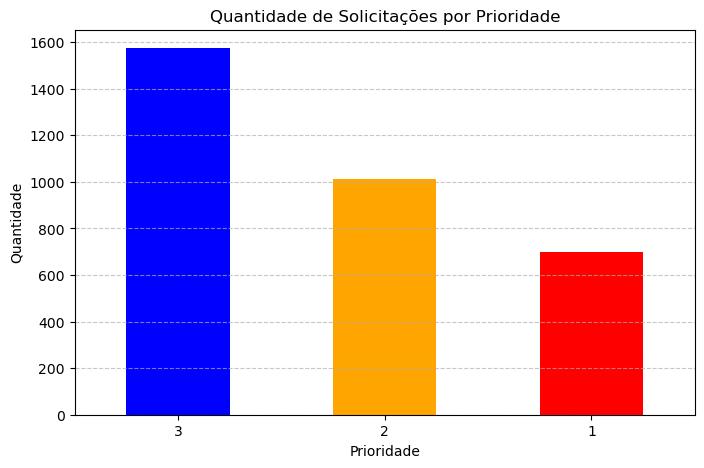

In [57]:
import matplotlib.pyplot as plt  # Importa a biblioteca para gerar gráficos
import pandas as pd

# Carregar o arquivo Excel
df = pd.read_excel('Manutenção.xlsx')

# Remover espaços extras nos nomes das prioridades
df["Prioridade"] = df["Prioridade"].astype(str).str.strip()

# Contar a quantidade de cada prioridade
contagem_prioridade = df["Prioridade"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
contagem_prioridade.plot(kind="bar", color=["blue", "orange", "red", "green"])

plt.title("Quantidade de Solicitações por Prioridade")
plt.xlabel("Prioridade")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)  # Mantém os rótulos horizontais
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



In [59]:
print(df["Categoria"].unique())  # Lista todas as categorias diferentes


['Pomadas' 'Xarope' 'Utilidades']


In [61]:
df["Categoria"] = df["Categoria"].astype(str).str.strip()


In [63]:
contagem_categoria = df["Categoria"].value_counts()


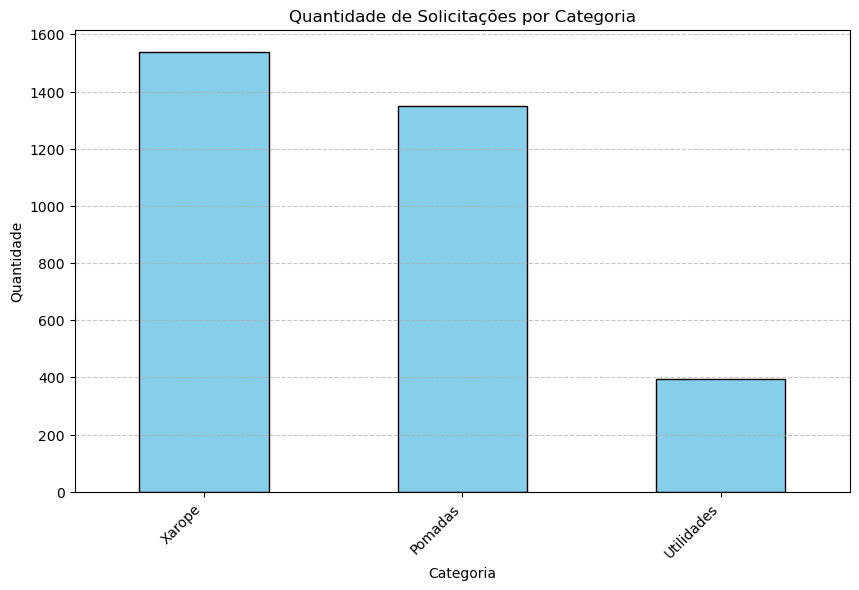

In [65]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
contagem_categoria.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Quantidade de Solicitações por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos para melhor visualização
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [67]:
print(df["Tipo"].unique())  # Lista todos os tipos diferentes


['Segurança' 'Produtividade' 'Meio Ambiente']


In [69]:
df["Tipo"] = df["Tipo"].astype(str).str.strip()


In [71]:
contagem_tipo = df["Tipo"].value_counts()


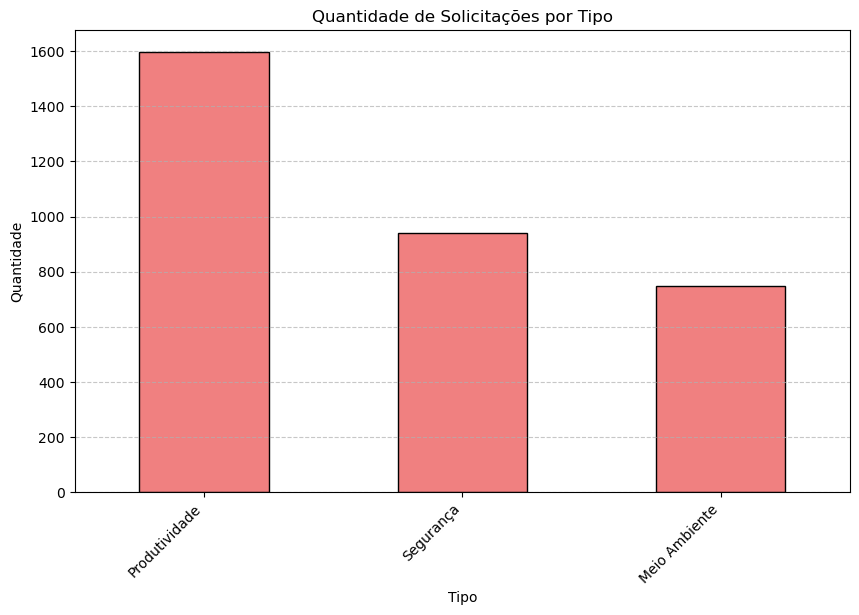

In [77]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
contagem_tipo.plot(kind="bar", color="lightcoral", edgecolor="black")

plt.title("Quantidade de Solicitações por Tipo")
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos para melhor visualização
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [87]:
print(df["Oficina"].unique())  

['Elétrica' 'Operação' 'Mecânica' 'Automação']


In [97]:
df["Oficina"] = df["Oficina"].astype(str).str.strip()


In [99]:
contagem_oficina = df["Oficina"].value_counts()


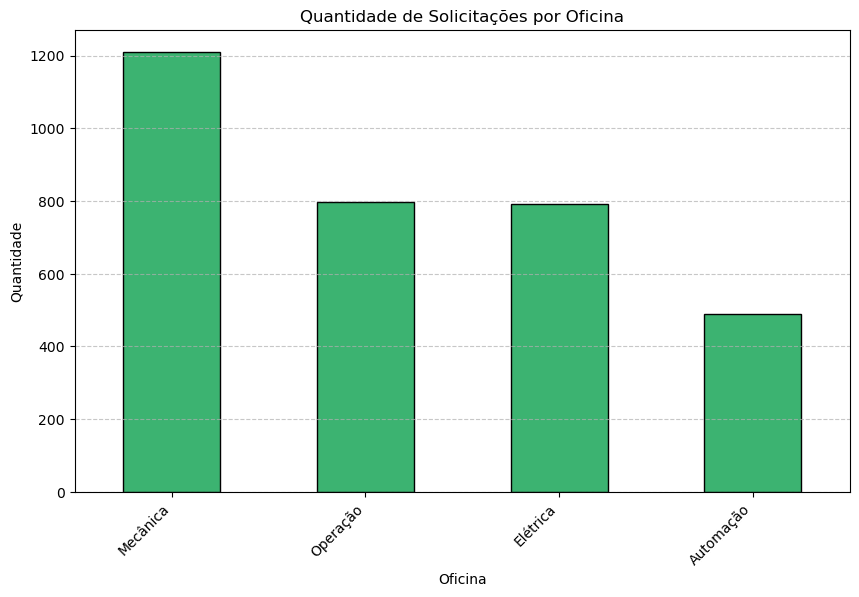

In [101]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
contagem_oficina.plot(kind="bar", color="mediumseagreen", edgecolor="black")

plt.title("Quantidade de Solicitações por Oficina")
plt.xlabel("Oficina")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos para melhor visualização
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Substitua 'manutencao.xlsx' pelo nome correto do seu arquivo
df = pd.read_excel("MAnutenção.xlsx")


In [107]:
df["DataAbertura"] = pd.to_datetime(df["DataAbertura"], dayfirst=True, errors="coerce")
df["Termino Previsto"] = pd.to_datetime(df["Termino Previsto"], dayfirst=True, errors="coerce")
df["TerminoReal"] = pd.to_datetime(df["TerminoReal"], dayfirst=True, errors="coerce")


In [109]:
df["Desvio SLA"] = (df["TerminoReal"] - df["Termino Previsto"]).dt.days


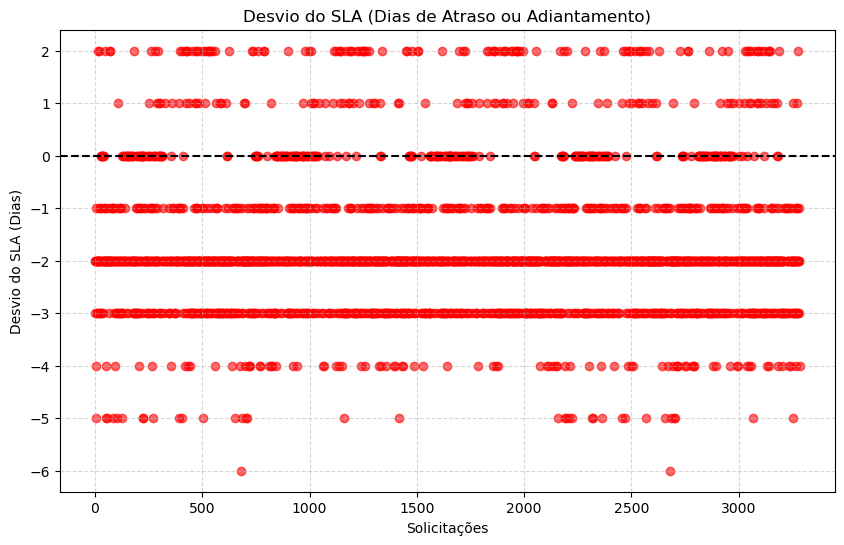

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Desvio SLA"], color="red", alpha=0.6)

plt.axhline(y=0, color="black", linestyle="--")  # Linha de referência no zero
plt.title("Desvio do SLA (Dias de Atraso ou Adiantamento)")
plt.xlabel("Solicitações")
plt.ylabel("Desvio do SLA (Dias)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


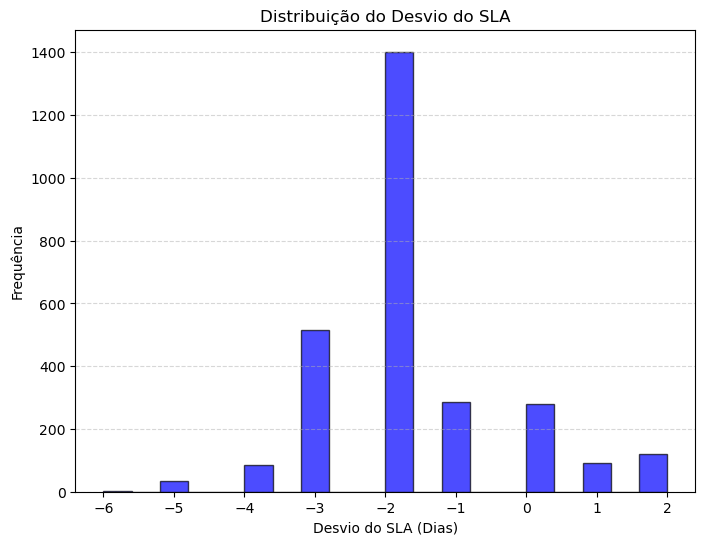

In [113]:
plt.figure(figsize=(8, 6))
plt.hist(df["Desvio SLA"].dropna(), bins=20, color="blue", edgecolor="black", alpha=0.7)

plt.title("Distribuição do Desvio do SLA")
plt.xlabel("Desvio do SLA (Dias)")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


In [115]:
df["Desvio SLA"] = (df["TerminoReal"] - df["Termino Previsto"]).dt.days


In [127]:
display(df[["SS", "Termino Previsto", "TerminoReal", "Desvio SLA"]].head())


,SS,Termino Previsto,TerminoReal,Desvio SLA
0,SS2478214,2022-10-23,2022-10-20,-3.0
1,SS2478215,2022-09-27,2022-09-25,-2.0
2,SS2478216,2022-11-27,2022-11-25,-2.0
3,SS2478217,2022-10-20,2022-10-16,-4.0
4,SS2478218,2022-09-13,2022-09-12,-1.0


In [121]:
df_atrasadas = df[df["Desvio SLA"] > 0]
display(df_atrasadas[["SS", "Termino Previsto", "TerminoReal", "Desvio SLA"]])


,SS,Termino Previsto,TerminoReal,Desvio SLA
14,SS2478228,2022-12-28,2022-12-30,2.0
20,SS2478234,2022-12-20,2022-12-22,2.0
45,SS2478259,2022-12-20,2022-12-22,2.0
70,SS2478284,2022-09-02,2022-09-04,2.0
71,SS2478285,2022-12-14,2022-12-16,2.0
...,...,...,...,...
3179,SS2481393,2024-02-20,2024-02-21,1.0
3190,SS2481404,2024-03-24,2024-03-26,2.0
3252,SS2481466,2024-03-14,2024-03-15,1.0
3272,SS2481486,2024-04-13,2024-04-14,1.0


In [129]:
df_no_prazo = df[df["Desvio SLA"] <= 0]
display(df_no_prazo[["SS", "Termino Previsto", "TerminoReal", "Desvio SLA"]])


,SS,Termino Previsto,TerminoReal,Desvio SLA
0,SS2478214,2022-10-23,2022-10-20,-3.0
1,SS2478215,2022-09-27,2022-09-25,-2.0
2,SS2478216,2022-11-27,2022-11-25,-2.0
3,SS2478217,2022-10-20,2022-10-16,-4.0
4,SS2478218,2022-09-13,2022-09-12,-1.0
...,...,...,...,...
3280,SS2481494,2024-04-14,2024-04-11,-3.0
3281,SS2481495,2024-04-30,2024-04-29,-1.0
3282,SS2481496,2024-04-15,2024-04-13,-2.0
3283,SS2481497,2024-04-30,2024-04-28,-2.0
